In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import exposure
import skimage.exposure as exposure
import cv2

***1. Take your picture, convert into a grey scale image and perform the following point operations (choose appropriate constants):<br>
a. Image Negation<br>
b. Log transformation <br>
c. Gamma correction***


***A. Image Negation***

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1cddfe18d0>,
 Text(0.5, 1.0, 'Image Negation'))

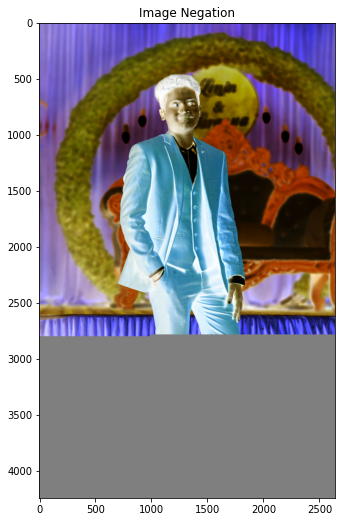

In [55]:
def imageNegation(image):
    inverted_image = np.copy(image)
    inverted_image = 255 - inverted_image[:,:]
    return inverted_image

img = np.array(cv2.imread('/content/me.jpg'))

_image = imageNegation(img)
cv2.imwrite('/content/me_save.jpg', _image)
img2 = cv2.imread(r'/content/me_save.jpg')
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(18)
plt.subplot(131),plt.imshow(img2),plt.title('Image Negation')



***B. LOG TRANSFORMATION***

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1cdd6f21d0>,
 Text(0.5, 1.0, 'After Log transformation'))

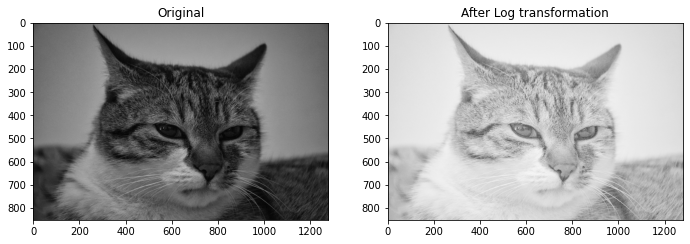

In [50]:
img = cv2.imread('/content/cat.png')
c = 255/(np.log(1 + np.max(img)))
s = c * np.log(1 + img)
transformed = np.array(s, dtype = np.uint8)
cv2.imwrite('/content/log_transformation.jpg', transformed)
img2 = cv2.imread(r'/content/log_transformation.jpg')
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(18)
plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.subplot(132),plt.imshow(img2),plt.title('After Log transformation')

***C. GAMMA CORRECTION***

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


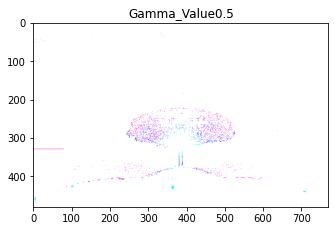

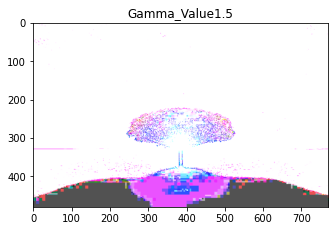

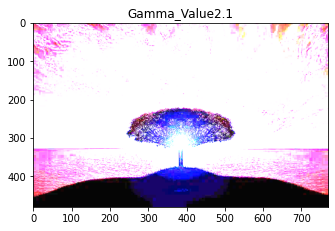

In [53]:
img = cv2.imread('/content/tree1.png')

for gamma in [0.5, 1.5, 2.1]:
    # gamma correction = s = c*r^γ .
    gamma_correction = np.array(255*(img / 255) ** gamma)

    # Save gamma transformed images.
    cv2.imwrite('/content/Gamma_Value'+str(gamma)+'.jpg', gamma_correction)
    f = plt.figure()
    f.set_figwidth(18)
    f.set_figheight(18)
    plt.subplot(131),plt.imshow(gamma_correction),plt.title('Gamma_Value'+str(gamma))
 

***2. Consider an image of your choice and perform histogram equalization and histogram 
matching. Choose a gray scale image or a colour image***

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1cdd698850>,
 Text(0.5, 1.0, 'Final'))

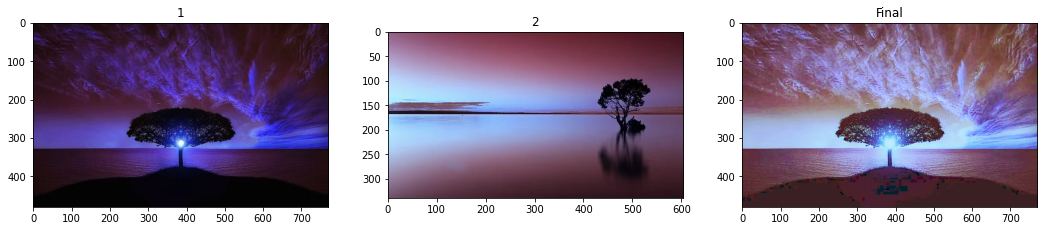

In [48]:
def histogramEqualization(im):
    f = {i:0 for i in range(256)}
    new_f = f.copy()
    pmf = f.copy()
    cdf = f.copy()
    (m,n) = im.shape
    N = m*n
    prev = 0
    
    for i in range(m):
        for j in range(n):
            f[im[i,j]] += 1

    for k in f:
        pmf[k] = f[k]/N
        
    for k in pmf:
        cdf[k] = prev+pmf[k]
        prev = cdf[k]
    
    new_im = im.copy()

    for i in range(m):
        for j in range(n):
            new_im[i,j] = round(255*cdf[im[i,j]])
            new_f[new_im[i,j]] += 1

    res_im = new_im
    return res_im

image = np.array(Image.open("/content/cat.png").convert("L"))

_image = histogramEqualization(image)

pil_img = Image.fromarray(_image)
pil_img.save("/content/save.png")

# 
source = cv2.imread("/content/tree1.png")
reference = cv2.imread("/content/tree2.png")

matched = exposure.match_histograms(source, reference, multichannel=True)
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(18)
plt.subplot(131),plt.imshow(source),plt.title('1')
plt.subplot(132),plt.imshow(reference),plt.title('2')
plt.subplot(133),plt.imshow(matched),plt.title('Final')

***3. Take any of the image from the above link and perform both mean, median and 
Gaussian filters on it. Compare the results with respect to PSNR (peak signal to noise 
ratio)***

In [62]:
img = cv2.imread("/content/tiger.png")
    
def _psnr(original, filtered):
    mse = np.mean((original - filtered)**2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20*np.log10(max_pixel/np.sqrt(mse))
    return psnr

PSNR Value = 29.986719220479703


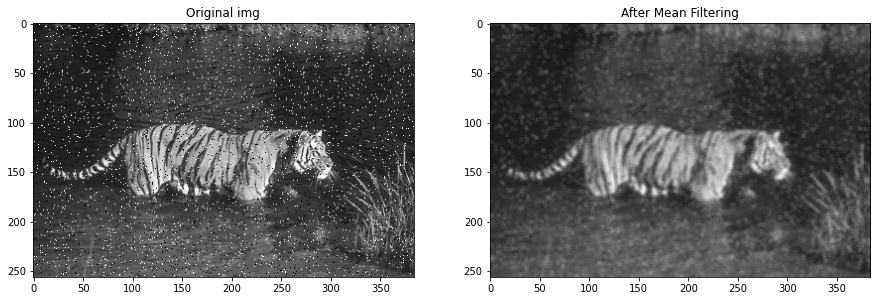

In [66]:
# mean filtering
mean = cv2.blur(img, (4,4))
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.subplot(121),plt.imshow(img),plt.title('Original img')
plt.subplot(122),plt.imshow(mean),plt.title('After Mean Filtering')

psnr = _psnr(img, mean)
print(f"PSNR Value = {psnr}")

PSNR Value = 31.91506779232022


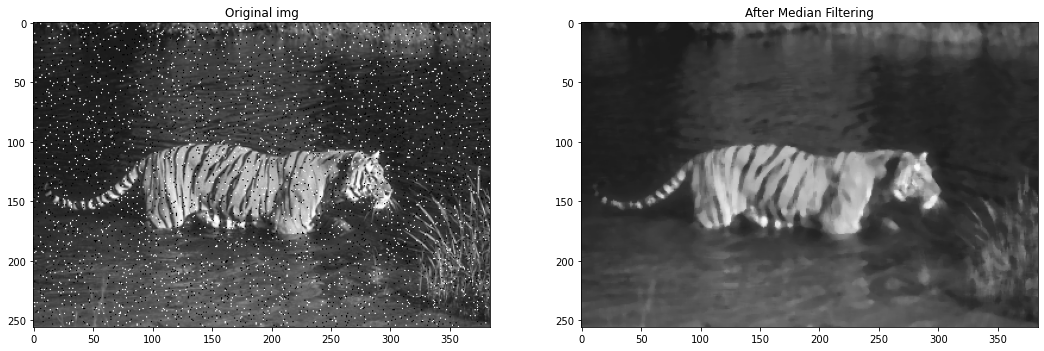

In [64]:
# median filtering
median = cv2.medianBlur(img, 5)

f = plt.figure()
f.set_figwidth(18)
f.set_figheight(18)
plt.subplot(121),plt.imshow(img),plt.title('Original img')
plt.subplot(122),plt.imshow(median),plt.title('After Median Filtering')

psnr = _psnr(img, median)
print(f"PSNR Value = {psnr}")

PSNR Value = 30.728147950904663


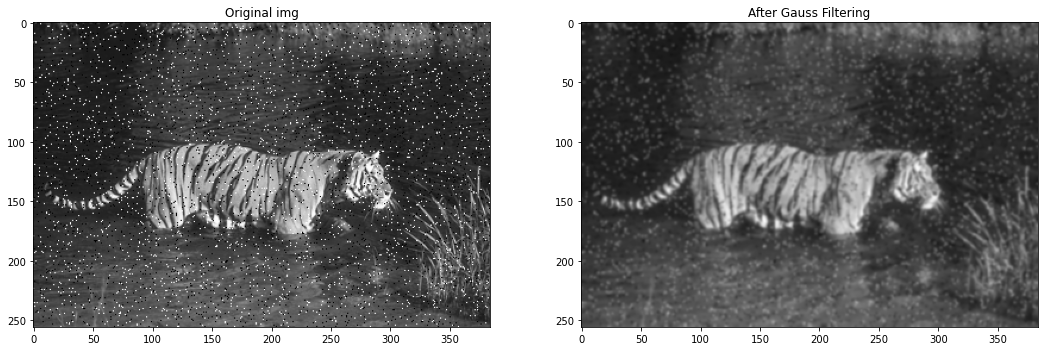

In [65]:
# Gaussian filtering
gauss = cv2.GaussianBlur(img, (5,5), 0)

f = plt.figure()
f.set_figwidth(18)
f.set_figheight(18)
plt.subplot(121),plt.imshow(img),plt.title('Original img')
plt.subplot(122),plt.imshow(gauss),plt.title('After Gauss Filtering')

psnr = _psnr(img, gauss)
print(f"PSNR Value = {psnr}")